<a href="https://colab.research.google.com/github/dgambone3/CSC_6850-MachineLearning-AssignmentTwo/blob/main/CSC_6850-MachineLearning-Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Diana Gambone**

***Graduate*** / Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [224]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using the Wine dataset from sklearn:

In [225]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

<Figure size 360x360 with 0 Axes>

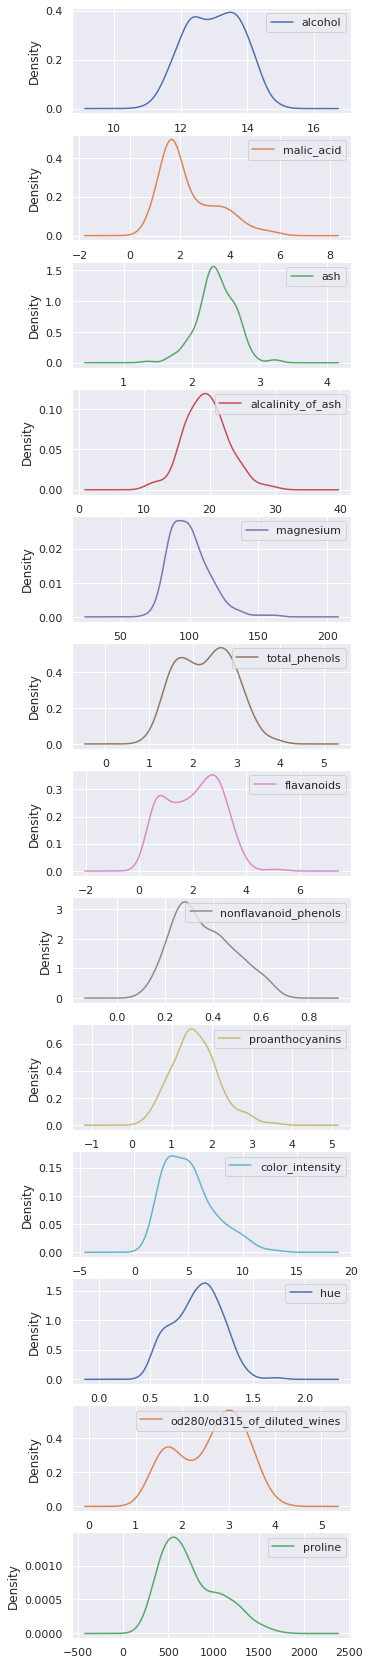

In [226]:
# Question 1
print(wine.DESCR)
fig = plt.figure(figsize=(5,5), layout='tight')
winedf = pd.DataFrame(wine.data, columns=wine.feature_names)
winedf.plot(kind='density', figsize=(5,30),subplots=True, sharex=False)
fig.show()

1. There is an inconsitencey in the reporting of the class descriptions of this dataset.The top of the dataset description states 'Number of Instances: 178 (50 in each of three classes)', but further down in the report it states ':Class Distribution: class_0 (59), class_1 (71), class_2 (48)'. 
2. It appears that most the datasets have a normal distribution, with the exception of a few. OD280/OD315 of diluted wines has a bimodal distribution, along with total phenols, and flavanoids.









# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [227]:
# Question 2
from sklearn import model_selection

winedf = pd.DataFrame(wine.data, columns=wine.feature_names)
winedf['label'] = wine.target
winedf = winedf[winedf['label'] != 2]

winedf.columns.values
label = winedf['label']
feat = winedf[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]

  
feat_trainP, feat_testP, label_trainP, label_testP = model_selection.train_test_split(feat, label, train_size=0.65, test_size=0.35, random_state=1234)

# **PERCEPTRON**

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [228]:
# Question 3
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=1234) # define model / classifier

train_percep = percep.fit(feat_trainP, label_trainP) # train perceptron object

accuracyP = train_percep.score(feat_trainP, label_trainP) # mean accuracy on given test labels and data;
print('Perceptron Accuracy:', accuracyP)


Perceptron Accuracy: 0.75


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [229]:
# Question 4
from sklearn import metrics

predP = train_percep.predict(feat_testP)
target_names = ['class 0', 'class 1']
print(metrics.classification_report(label_testP, predP, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.21      0.35        19
     class 1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



1. Class 0 has 100% precision which means the model correctly predicted all of the wines that were in class 0. But, the model had a very low recall for class 0 meaning it correctly predicted 21% of all the wines that would be in class 0 and were in class 0.Class 1 somewhat has a different representation with an average precision and perfect recall. 
2. Though class 0 has 100% precision, it has a low F1-Score which is a reflectin of the very low recall, and high precision. Class 1 has a higher F1-Score, meaning this dataset might be more balanced than class 0. 
3. The model has a moderate accuracy for each way of calculating this value, the different averages of accuracy didn't vary too much from eachother.  

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

,pred:Class1,pred:Class0
true:Class1,4,15
true:Class0,0,27


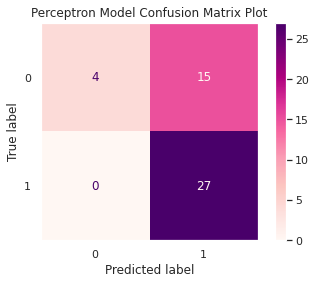

In [253]:
#Question 5 - part 1

matrixP = metrics.confusion_matrix(y_true=label_testP, y_pred=predP)
# pretty matrix
matrixP_df = pd.DataFrame(matrixP, index=['true:Class1', 'true:Class0'], columns=['pred:Class1', 'pred:Class0'])\
              .style.set_caption("Perceptron Model Confusion Matrix")
display(matrixP_df)
print('\n\n')
# plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(matrixP, display_labels=train_percep.classes_)
disp.plot(cmap='RdPu') #change color
plt.grid(False) #remove grid lines
plt.title('Perceptron Model Confusion Matrix Plot')
plt.show()

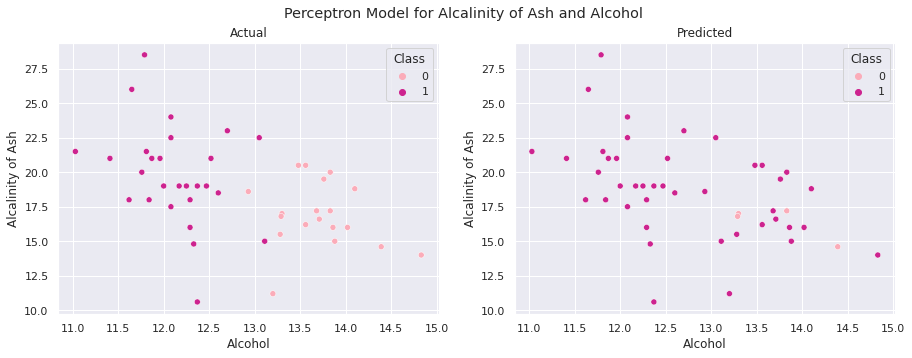

In [231]:
#Question 5 - part 2
testP_df = feat_testP.copy()
testP_df['label'] = label_testP.copy()
testP_df['predicted'] = predP.copy()

X = feat_testP[['alcalinity_of_ash','alcohol']].to_numpy()
y = label_testP.to_numpy()

train_percep.fit(X, y)

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
fig.suptitle('Perceptron Model for Alcalinity of Ash and Alcohol')

ax0 = sns.scatterplot(data=testP_df, x='alcohol', y='alcalinity_of_ash', hue='label', palette='RdPu', ax=ax[0])
ax0.title.set_text('Actual')
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Alcalinity of Ash')
ax0.grid(visible=True)
ax0.legend(title='Class')


ax1 = sns.scatterplot(data=testP_df, x='alcohol', y='alcalinity_of_ash', hue='predicted', palette='RdPu',ax=ax[1])
ax1.title.set_text('Predicted')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Alcalinity of Ash')
ax1.grid(visible=True)
ax1.legend(title='Class')

plt.show()

ax[0]=ax0
ax[1]=ax1

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

6. a) Yes, the confusion matrix lists that there are 4 data points correctly predicted to be class 0, and the rest of the data was predicted to be class one. By looking at the predicted scatte plot, it is visible that only 4 datapoints are class 0, and the rest are class 1. 

6. b) 
   1. The model classification report seems to appear accurate with how the data is being displayed. There were no datapoints that were falsely predicted to be class 1, which reflects the 100% recall. 
   2. Meanwhile, 15 of the class 0 labels were falsely predicted to be class 1, and 27 of the class 1 data points were correctly predicted, reflecting class 1's perfect recall.

# **TREE**

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [232]:
wine = datasets.load_wine()
winedf = pd.DataFrame(wine.data, columns=wine.feature_names)
winedf['label'] = wine.target
# winedf = winedf[winedf['label'] != 2]

label = winedf['label']
feat = winedf[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
feat_trainT, feat_testT, label_trainT, label_testT = model_selection.train_test_split(feat, label, train_size=0.65, test_size=0.35, random_state=1234)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [233]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1234) # define model
train_tree = tree.fit(feat_trainT, label_trainT) # train tree model

accuracyT = train_tree.score(feat_trainT, label_trainT)
print('Tree Accuracy:', accuracyT)

Tree Accuracy: 1.0


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [234]:
predT = train_tree.predict(feat_testT)
target_names = ['class 0', 'class 1', 'class 2']

print(metrics.classification_report(label_testT, predT, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.89      0.94        19
     class 1       0.92      0.92      0.92        26
     class 2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



1. Class 0 has perfect precision, same as for the perceptron model, but has a much higher recall and resultant F1-score.
2. Class 1 is also performing better in this model, with migh higher and equal values for both precision and recall. 
3. Class 2 has a high precision, and perfect recall. 
4. Overall, this model appears to perform much better than the perceptron model, and has much higher accutacy of 94% compared to the perceptron's 67% accuracy. 

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

,pred:Class0,pred:Class1,pred:Class2
true:Class0,17,2,0
true:Class1,0,24,2
true:Class2,0,0,18


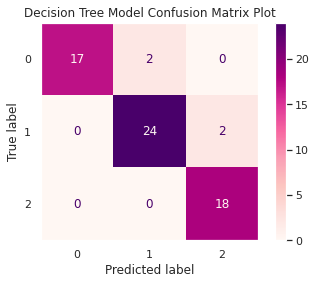

In [249]:
# Question 10 - part 1
matrixT = metrics.confusion_matrix(y_true=label_testT, y_pred=predT)
# pretty matrix
matrixT_df = pd.DataFrame(matrixT, index=['true:Class0', 'true:Class1', 'true:Class2'], columns=['pred:Class0', 'pred:Class1', 'pred:Class2'])\
              .style.set_caption("Decision Tree Model Confusion Matrix")
display(matrixT_df)
print('\n\n')
# plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(matrixT, display_labels=train_tree.classes_)
disp.plot(cmap='RdPu') #change color
plt.grid(False) #remove grid lines
plt.title('Decision Tree Model Confusion Matrix Plot')
plt.show()

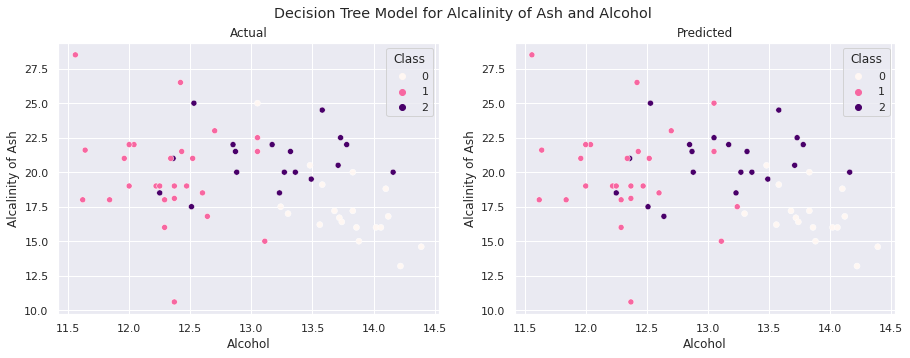

In [236]:
# Question 10 - part 2
testT_df = feat_testT.copy()
testT_df['label'] = label_testT.copy()
testT_df['predicted'] = predT.copy()

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
fig.suptitle('Decision Tree Model for Alcalinity of Ash and Alcohol')

ax0 = sns.scatterplot(data=testT_df, x='alcohol', y='alcalinity_of_ash', hue='label', palette='RdPu', ax=ax[0])
ax0.title.set_text('Actual')
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Alcalinity of Ash')
ax0.grid(visible=True)
ax0.legend(title='Class')

ax1 = sns.scatterplot(data=testT_df, x='alcohol', y='alcalinity_of_ash', hue='predicted', palette='RdPu',ax=ax[1])
ax1.title.set_text('Predicted')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Alcalinity of Ash')
ax1.grid(visible=True)
ax1.legend(title='Class')

ax[0]=ax0
ax[1]=ax1

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

a) Yes, it appers that the prediction by the model matches the confusion matrix with only a few noticably incorecctly predicted data points. 

b) 
  1. It appears that most of the incorectly predicted datapoints occur around the middle of the scatter plot, for example most are around 13.0 alcohol and 20 to 22 alcalinity of ash. 
  2. All the classes are sort of clustered or grouped around eachother in the predicted plot, but class 1 seems to have the most spread. 


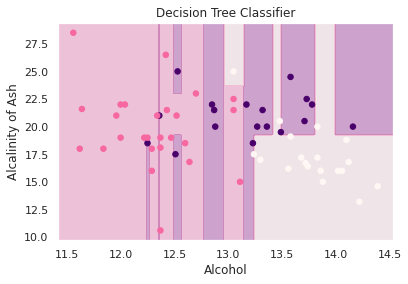

In [256]:
# Question 11 - part c
# Function code was copied from class example 1.
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  
    Z = np.reshape(a=Z, newshape=xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1, )

    ax.set(xlim=xlim, ylim=ylim)
    plt.title('Decision Tree Classifier')
    plt.grid(False)
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Alcalinity of Ash')
    plt.show()

X = feat_testT[['alcohol', 'alcalinity_of_ash']].to_numpy()
y = label_testT.to_numpy()

visualize_classifier(DecisionTreeClassifier(), X, y, cmap='RdPu')


# **LOGREG**

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [238]:
wine = datasets.load_wine()
winedf = pd.DataFrame(wine.data, columns=wine.feature_names)
winedf['label'] = wine.target

label = winedf['label']
feat = winedf[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
       
feat_trainL, feat_testL, label_trainL, label_testL = model_selection.train_test_split(feat, label, train_size=0.65, test_size=0.35, random_state=1234)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [239]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=1234)

train_logreg = logreg.fit(feat_trainL, label_trainL)

# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [240]:
predL = train_logreg.predict(feat_testL)
target_names = ['class 0', 'class 1', 'class 2']

print(metrics.classification_report(label_testL, predL, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.95      0.97        19
     class 1       0.96      0.92      0.94        26
     class 2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



1. Class 0 has a perfect precision, and high recall and F1-score. Class 1 has high precision and recall, but precision is slightly higher for thie model.Class 2 has high precision and perfect recall. 
2. This model has similar values to the decision tree report, but this model has slightly higher accuracy.
3. The values for class 1 precision and recall are the same values, but flipped, as compared to the decision tree. Also, all the support values are the same in this report as the decision tree report. 

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

,pred:Class0,pred:Class1,pred:Class2
true:Class0,18,1,0
true:Class1,0,24,2
true:Class2,0,0,18


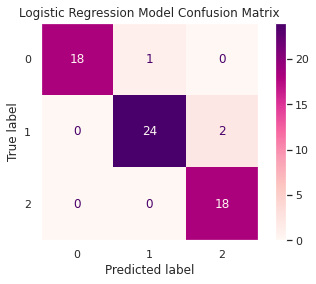

In [255]:
# Question 15 - part 1
matrixL = metrics.confusion_matrix(y_true=label_testL, y_pred=predL)
# pretty matrix
matrixL_df = pd.DataFrame(matrixL, index=['true:Class0', 'true:Class1', 'true:Class2'], columns=['pred:Class0', 'pred:Class1', 'pred:Class2'])\
              .style.set_caption("Logistic Regression Model Confusion Matrix")
display(matrixL_df)
print('\n\n')
# plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(matrixL, display_labels=train_tree.classes_)
disp.plot(cmap='RdPu') #change color
plt.grid(False) #remove grid lines
plt.title('Logistic Regression Model Confusion Matrix')
plt.show()

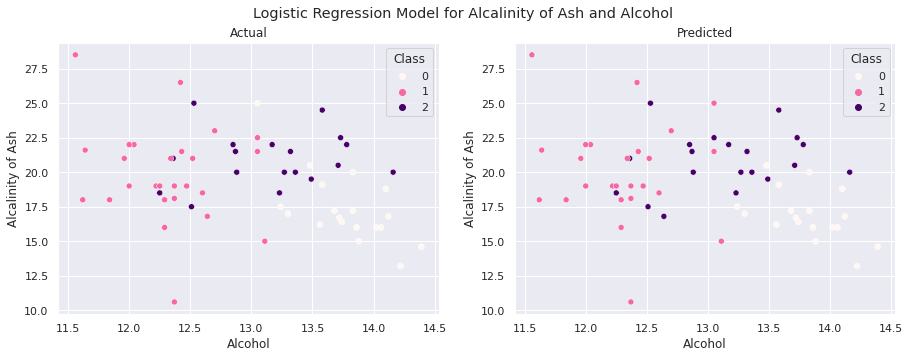

In [242]:
# Question 15 - part 2
testL_df = feat_testL.copy()
testL_df['label'] = label_testL.copy()
testL_df['predicted'] = predL.copy()

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
fig.suptitle('Logistic Regression Model for Alcalinity of Ash and Alcohol')

ax0 = sns.scatterplot(data=testL_df, x='alcohol', y='alcalinity_of_ash', hue='label', palette='RdPu', ax=ax[0])
ax0.title.set_text('Actual')
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Alcalinity of Ash')
ax0.grid(visible=True)
ax0.legend(title='Class')

ax1 = sns.scatterplot(data=testL_df, x='alcohol', y='alcalinity_of_ash', hue='predicted', palette='RdPu',ax=ax[1])
ax1.title.set_text('Predicted')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Alcalinity of Ash')
ax1.grid(visible=True)
ax1.legend(title='Class')

ax[0]=ax0
ax[1]=ax1

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

16. a) Yes, the predicted plot matches with the confusion matrix for this model. It appears that there are the same amount of incorrectly predicted data points in the scatter plot, as reported in the confusion matrix.

16. b) The predictions appear to be in line with the model performance shown in the scatter plot. There are the same amount of correctly and incorrectly predicted data points shown in the plot. Most of the wrong predictions are roughly on the borders of the class clusters. 

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [243]:
# Question 17
df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'], )

df['Model'] = ['Perceptron', 'Decision Tree', 'Logistic Regression']

df.at[df['Model'] == 'Perceptron', 'Accuracy'] = metrics.accuracy_score(label_testP, predP).round(2)
df.at[df['Model'] == 'Perceptron', 'Precision'] = metrics.precision_score(label_testP, predP).round(2)
df.at[df['Model'] == 'Perceptron', 'Recall'] = metrics.recall_score(label_testP, predP).round(2)

df.at[df['Model'] == 'Decision Tree', 'Accuracy'] = metrics.accuracy_score(label_testT, predT).round(2)
df.at[df['Model'] == 'Decision Tree', 'Precision'] = metrics.precision_score(label_testT, predT, average='weighted').round(2)
df.at[df['Model'] == 'Decision Tree', 'Recall'] = metrics.recall_score(label_testT, predT, average='weighted').round(2)

df.at[df['Model'] == 'Logistic Regression', 'Accuracy'] = metrics.accuracy_score(label_testL, predL).round(2)
df.at[df['Model'] == 'Logistic Regression', 'Precision'] = metrics.precision_score(label_testL, predL, average='weighted').round(2)
df.at[df['Model'] == 'Logistic Regression', 'Recall'] = metrics.recall_score(label_testL, predL, average='weighted').round(2)

display(df)

,Model,Accuracy,Precision,Recall
0,Perceptron,0.67,0.64,1.0
1,Decision Tree,0.94,0.94,0.94
2,Logistic Regression,0.95,0.95,0.95


17. The logistic regression model is the best performing model out of the three. This model has the highest overall accuracy, precision, and recall. Though the perceptron model has 100% recall, it has very low accuracy and precision. The decision tree model isn't bad, and is only slightly worse performing than the logistic regression by 1%. The decision tree wouldn't be a bad choice if logistic regression wasn't an option. The logistic regression model has consistient percentages for each parameter.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


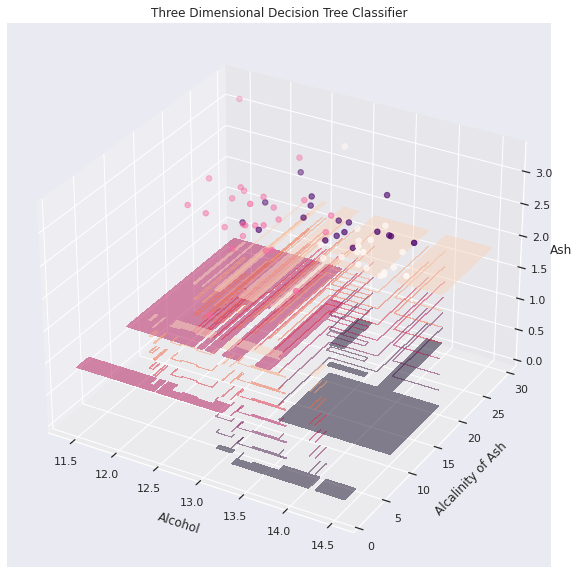

In [254]:
# Question 3. a)
# Function code copied from in class example set 1
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    a=X[:,0]
    b=X[:,1]
    c=X[:,2]

    # Plot the training points
    ax.scatter(a,b,c, c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    # ax.axis('tight')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()

    
    model.fit(np.c_[a.ravel(), b.ravel()], y)
    xx,yy = np.meshgrid(np.linspace(*xlim, num=200),
                            np.linspace(*ylim, num=200))
    XY = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(yy.shape)
    ax.contourf(xx,yy,XY, alpha=0.5,)
    

    model.fit(np.c_[a.ravel(), c.ravel()], y)
    xx,zz = np.meshgrid(np.linspace(*xlim, num=200),
                            np.linspace(*zlim, num=200))
    XZ = model.predict(np.c_[xx.ravel(), zz.ravel()]).reshape(zz.shape)
    ax.contourf(xx,zz,XZ, alpha=0.5)
 
    ax.set_title('Three Dimensional Decision Tree Classifier')
    ax.set_xlabel('\nAlcohol')
    ax.set_ylabel('\nAlcalinity of Ash')
    ax.set_zlabel('Ash')
    plt.show()

X = feat_testT[['alcohol', 'alcalinity_of_ash', 'ash']].to_numpy()
y = label_testT.to_numpy()

visualize_classifier(DecisionTreeClassifier(), X, y, cmap='RdPu')

